In [1]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import read_csv
import pandas as pd

In [2]:
data_2d = read_csv('data/data_2d.csv', header=None)
X, y = data_2d.iloc[:, 1:], data_2d.iloc[:, 0]
X, y

(            1         2
 0   -0.768716  0.460860
 1    2.687848  2.366961
 2   -0.201379  0.470430
 3    0.608496  1.225400
 4   -0.082282  1.137218
 ..        ...       ...
 195  0.629144  4.378584
 196 -0.723824  5.361801
 197  1.346107  2.333476
 198  3.608219  3.411546
 199  3.764228  4.372587
 
 [200 rows x 2 columns],
 0      0.0
 1      0.0
 2      0.0
 3      0.0
 4      0.0
       ... 
 195    1.0
 196    1.0
 197    1.0
 198    1.0
 199    1.0
 Name: 0, Length: 200, dtype: float64)

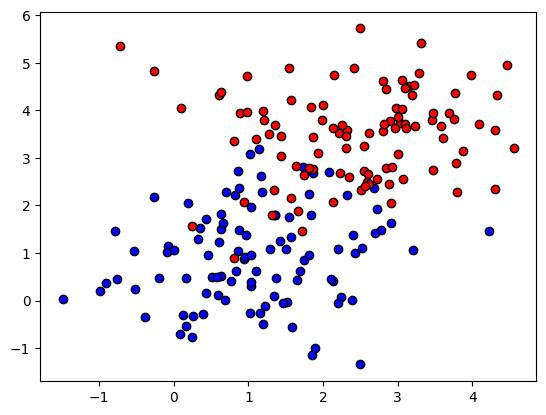

In [3]:
plt.scatter(
   data_2d[data_2d[0] == 0][1], data_2d[data_2d[0] == 0][2],
   c='blue',
   edgecolor='black'
)
plt.scatter(
   data_2d[data_2d[0] == 1][1], data_2d[data_2d[0] == 1][2],
   c='red',
   edgecolor='black'
)

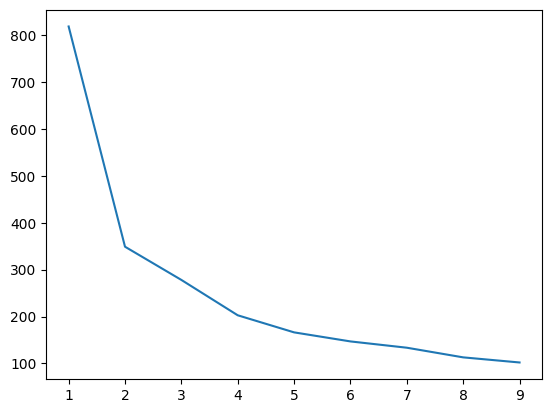

In [4]:
# Elbow method
inertia_values = []
for i in range(1, 10):
    kmeans = KMeans(
        n_clusters=i, init='random',
        n_init=1, max_iter=4, 
        tol=1e-04, random_state=42
    )
    y_km = kmeans.fit_predict(X)
    inertia_values.append(kmeans.inertia_)

plt.plot(range(1, 10), inertia_values)

In [5]:
kmeans = KMeans(
        n_clusters=2, init='random',
        n_init=1, max_iter=100, 
        tol=1e-04, random_state=2
    )
kmeans.fit_predict(X)
labels = pd.DataFrame(kmeans.labels_, columns=['res'])
kmeans.labels_

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1], dtype=int32)

In [6]:
result = pd.concat([data_2d, labels], axis=1)
result

,0,1,2,res
0,0.0,-0.768716,0.460860,0
1,0.0,2.687848,2.366961,1
2,0.0,-0.201379,0.470430,0
3,0.0,0.608496,1.225400,0
4,0.0,-0.082282,1.137218,0
...,...,...,...,...
195,1.0,0.629144,4.378584,1
196,1.0,-0.723824,5.361801,1
197,1.0,1.346107,2.333476,0
198,1.0,3.608219,3.411546,1


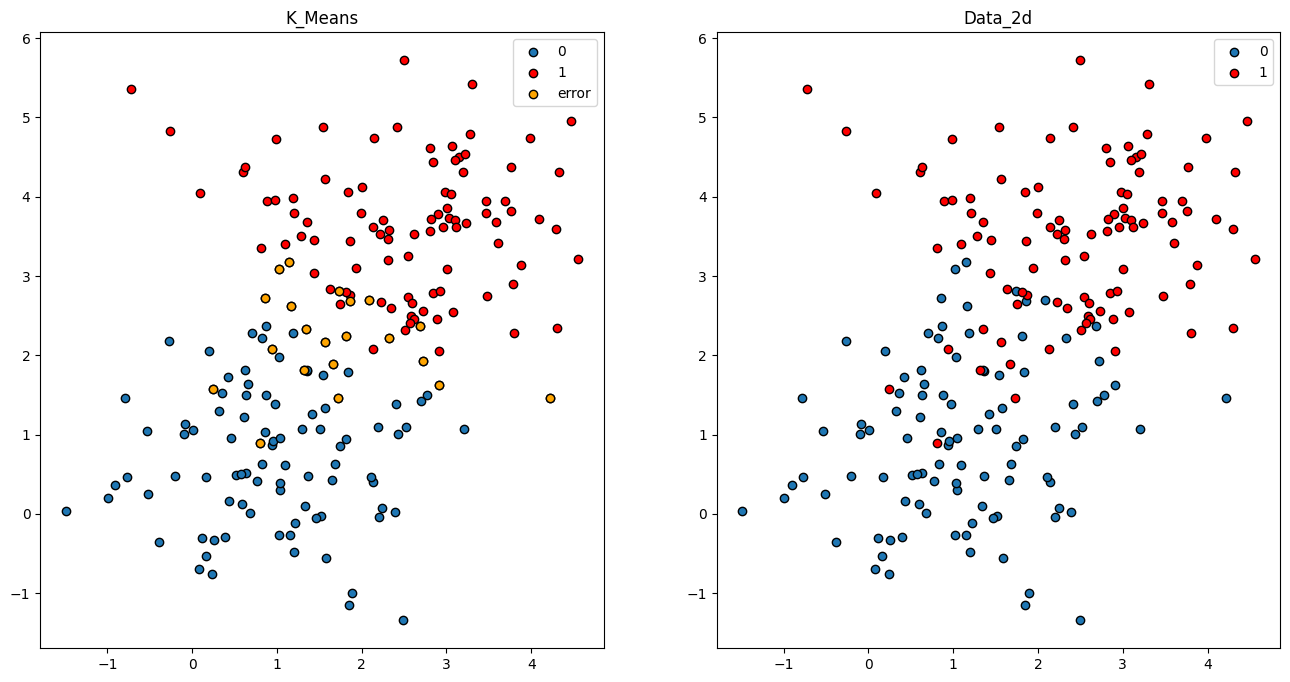

In [7]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))
axes[0].set_title('K_Means')
res = result['res']
axes[0].scatter(result[res == 0][1], 
                result[res == 0][2], 
                edgecolor='black')
axes[0].scatter(result[res == 1][1], 
                result[res == 1][2], 
                c='red', 
                edgecolor='black')

axes[0].scatter(result[res != result[0]][1],
                result[res != result[0]][2],
               c = 'orange',
               edgecolor='black')
axes[0].legend(['0', '1', 'error'])

axes[1].set_title('Data_2d')
axes[1].scatter(result[result[0] == 0][1], 
                result[result[0] == 0][2], 
                edgecolor='black')
axes[1].scatter(result[result[0] == 1][1], 
                result[result[0] == 1][2], 
                c='red', 
                edgecolor='black')
axes[1].legend(['0', '1'])
plt.show()

### mnist

In [8]:
from sklearn.decomposition import PCA
mnist = pd.read_csv('data/mnist.csv', header=None)
mnist.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
X, y = mnist.iloc[:, 1:], mnist.iloc[:, 0]

In [10]:
kmeans = KMeans(
    n_clusters=10, init='random',
    n_init='auto', 
    random_state=42
)
y_km = kmeans.fit_predict(X)
y_km

array([7, 3, 2, 8, 1, 2, 7, 1, 6, 6, 0, 0, 6, 8, 2, 4, 1, 7, 4, 1, 6, 5,
       5, 6, 1, 0, 7, 1, 8, 9, 4, 9, 4, 0, 6, 3, 7, 9, 9, 2, 9, 7, 1, 2,
       9, 4, 9, 3, 1, 1, 5, 4, 6, 4, 0, 8, 1, 2, 1, 9, 7, 6, 1, 3, 6, 9,
       3, 1, 4, 0, 7, 0, 3, 6, 2, 7, 4, 7, 2, 6, 1, 5, 3, 7, 1, 1, 7, 4,
       5, 2, 4, 5, 6, 4, 9, 1, 9, 2, 5, 1, 5, 0, 4, 1, 1, 1, 3, 2, 1, 1,
       6, 2, 9, 1, 7, 6, 1, 1, 6, 6, 4, 5, 7, 5, 7, 1, 0, 6, 4, 6, 5, 5,
       4, 7, 6, 2, 8, 2, 5, 6, 9, 7, 4, 2, 6, 9, 6, 3, 8, 9, 1, 1, 6, 4,
       9, 6, 5, 8, 4, 9, 1, 5, 4, 1, 5, 4, 1, 9, 9, 1, 1, 6, 3, 4, 3, 2,
       2, 4, 2, 4, 2, 4, 9, 0, 4, 1, 3, 4, 0, 9, 2, 9, 6, 1, 8, 9, 2, 5,
       1, 3, 4, 0, 2, 9, 2, 4, 6, 4, 3, 1, 1, 6, 1, 9, 1, 8, 4, 6, 6, 4,
       7, 8, 8, 7, 2, 3, 4, 9, 2, 7, 3, 9, 4, 6, 7, 1, 3, 3, 1, 9, 4, 4,
       6, 7, 9, 9, 0, 9, 1, 3, 1, 9, 1, 4, 7, 7, 3, 2, 3, 0, 6, 2, 7, 7,
       9, 2, 8, 2, 4, 0, 4, 8, 9, 1, 1, 1, 2, 6, 3, 9, 3, 6, 7, 9, 1, 3,
       5, 1, 2, 4, 1, 3, 1, 3, 8, 1, 0, 0, 3, 4, 2,

In [11]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalComponents

array([[-2.80485893e+02,  4.49269593e+02],
       [-7.18975643e+01, -1.04575974e+03],
       [-9.67814893e+02, -3.48405368e+02],
       [ 1.05444001e+03, -3.53086228e+02],
       [ 4.19036084e+02,  6.73058869e+02],
       [-1.00109035e+03, -3.07086956e+02],
       [-6.25176178e+01,  4.24900182e+02],
       [-1.71805860e+02,  4.31914585e+02],
       [ 1.83551237e+02,  1.73283837e+02],
       [ 9.03229760e+01,  5.56265306e+02],
       [ 9.52889683e+02, -1.00679800e+03],
       [ 3.60421607e+02, -3.30782694e+02],
       [ 3.26817588e+00,  9.38914960e+02],
       [ 1.08169436e+03, -3.53673667e+02],
       [-1.11412019e+03, -4.16235859e+02],
       [ 1.54833511e+02, -6.37230706e+02],
       [ 4.01432749e+02,  9.30944565e+02],
       [-4.35965425e-01,  3.95251527e+02],
       [ 1.41970718e+02, -4.59311049e+02],
       [ 5.61899451e+01,  7.65664333e+02],
       [-2.65475381e+02,  3.43570549e+02],
       [ 3.14990745e+02, -1.20803778e+02],
       [-2.11028087e+01,  1.66104607e+02],
       [-8.

In [12]:
principal_Df = pd.DataFrame(data = principalComponents)
principal_Df

,0,1
0,-280.485893,449.269593
1,-71.897564,-1045.759736
2,-967.814893,-348.405368
3,1054.440006,-353.086228
4,419.036084,673.058869
...,...,...
495,1105.657472,-246.551664
496,90.769151,812.517834
497,-500.250124,278.331317
498,425.683948,-41.334838


Text(0.5, 1.0, 'KMeans')

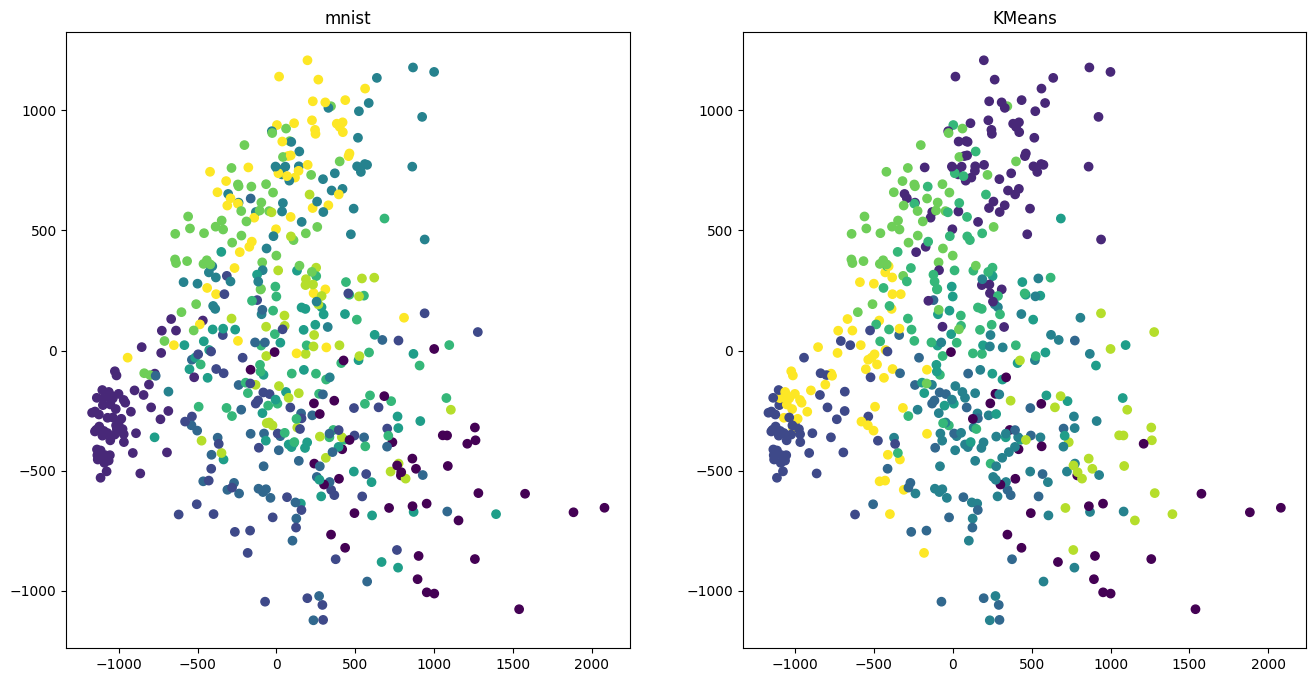

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))
axes[0].scatter(principalComponents[:, 0], principalComponents[:, 1], c=y)
axes[0].set_title('mnist')
axes[1].scatter(principalComponents[:, 0], principalComponents[:, 1], c=y_km)
axes[1].set_title('KMeans')